In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Replace `path` with directory where your `face_images` were downloaded. See `README.md`

In [2]:
import os, random
path = '/home/nonsodono/Documents/face_images'
os.chdir(path)  

### Converting Data to Fastai's `DataBlock` objects.

In [3]:
!pip3 install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *

/home/nonsodono/CV_Projects/cv_env/lib/python3.9/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [4]:
tfms = aug_transforms(do_flip = True, flip_vert = False, mult=2.0)
dls= ImageDataLoaders.from_folder(path,train = "train", 
                                   valid_pct=0.15, 
                                   item_tfms=Resize(128), 
                                   batch_tfms=tfms, bs = 32, 
                                   num_workers = 4)

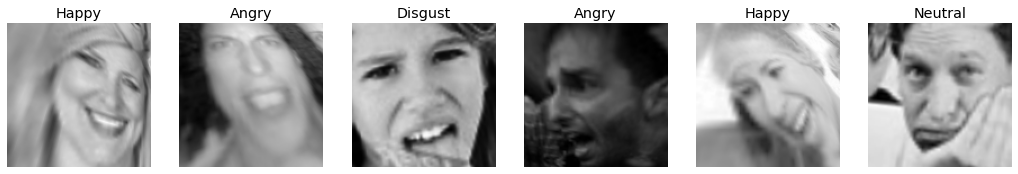

In [5]:
dls.train.show_batch(max_n=6, nrows=1)

### Data Augmentation

### Training the model using Fastai and `vgg19_bn` pretrained model

In [6]:
model = cnn_learner(dls, vgg19_bn, metrics=accuracy)
model.fine_tune(11)

epoch,train_loss,valid_loss,accuracy,time
0,1.742473,1.538596,0.433333,03:32


epoch,train_loss,valid_loss,accuracy,time
0,1.194213,1.074380,0.591971,05:10
1,1.083877,0.920259,0.654745,05:19
2,1.020802,0.876306,0.677372,05:14
3,0.959050,0.852712,0.679075,05:25
4,0.874273,0.810225,0.692457,05:15
5,0.817995,0.790173,0.703163,05:07
6,0.741322,0.757402,0.718248,05:07
7,0.642243,0.765454,0.730900,05:07
8,0.616782,0.744820,0.733577,05:07
9,0.559349,0.753773,0.734550,05:07


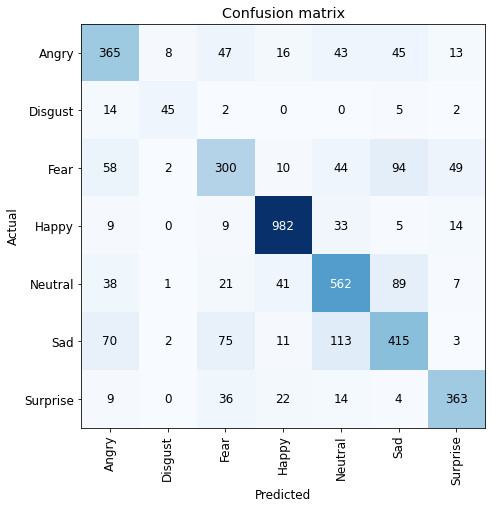

In [7]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(figsize=(7,7))

SuggestedLRs(lr_min=2.7542287716642023e-05, lr_steep=1.5848931980144698e-06)

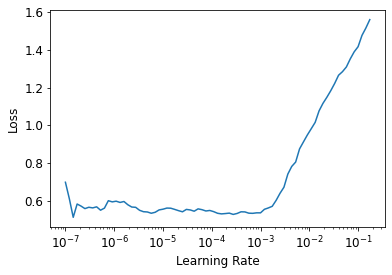

In [8]:
model.lr_find()

In [9]:
# model.unfreeze()
# model.fine_tune(5, base_lr=1e-3)

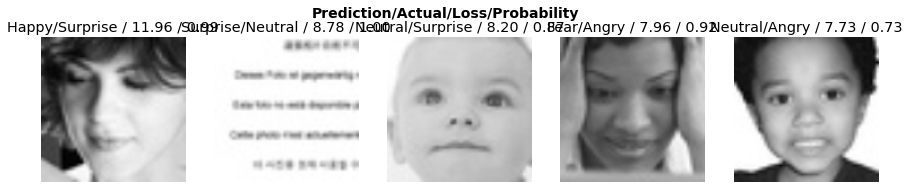

In [10]:
interp.plot_top_losses(5, nrows=1)

### Cleaning the data based on loss data.

In [11]:
# cleaner = ImageClassifierCleaner(model)
# cleaner

### Exporting the model 

In [12]:
model.export()

In [13]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

### Make `inferences` from the loaded model

In [14]:
model_inf = load_learner(path/'export.pkl')

In [15]:
# Show classes in the model
model_inf.dls.vocab

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

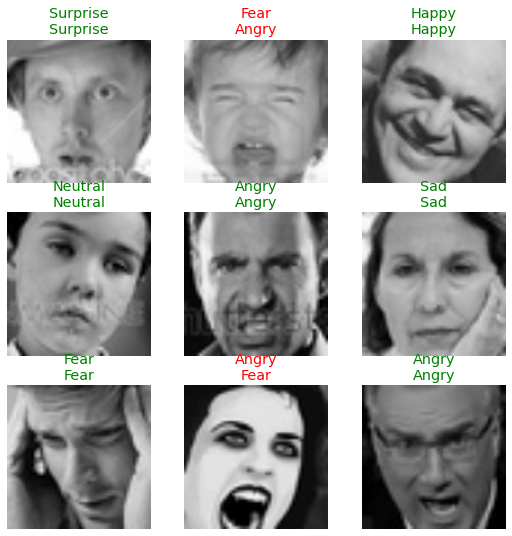

In [16]:
model.show_results()

In [17]:
### Add widgets to upload and classify example images

In [18]:
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Classify')
out_pl = widgets.Output()
lbl_pred = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = model_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [19]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your face!'), 
      btn_upload, btn_run, out_pl, lbl_pred])